In [1]:
import os
import time
import librosa
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *
from sklearnex import patch_sklearn, config_context

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = os.getcwd() + "/STFT_npy_dataset/"
path

'd:\\Study\\Code\\Python\\Sound_Classification_Bee_Qeen_Queenless/STFT_npy_dataset/'

In [3]:
TRAINING_DIR = path+"/train"
VALIDATION_DIR = path + "/val"
TEST_DIR = path + "/test"

print(TRAINING_DIR)
print(VALIDATION_DIR)
print(TEST_DIR)

d:\Study\Code\Python\Sound_Classification_Bee_Qeen_Queenless/STFT_npy_dataset//train
d:\Study\Code\Python\Sound_Classification_Bee_Qeen_Queenless/STFT_npy_dataset//val
d:\Study\Code\Python\Sound_Classification_Bee_Qeen_Queenless/STFT_npy_dataset//test


In [4]:
def data_loader(path):
    X = []
    Y = []
    for folder in os.listdir(path):
        for file in os.listdir(os.path.join(path, folder)):
            feature = np.load(os.path.join(path, folder, file))
            label = folder
            X += feature.tolist()
            Y += [label]*feature.shape[0]
    return X, Y

In [5]:
X_train, Y_train = data_loader(TRAINING_DIR)
X_val, Y_val = data_loader(VALIDATION_DIR)
X_test, Y_test = data_loader(TEST_DIR)

In [6]:
print("There are {} training samples and {} training labels".format(len(X_train), len(Y_train)))
print("There are {} validation samples and {} validation labels".format(len(X_val), len(Y_val)))
print("There are {} testing samples and {} testing labels".format(len(X_test), len(Y_test)))

There are 14000 training samples and 14000 training labels
There are 2000 validation samples and 2000 validation labels
There are 4000 testing samples and 4000 testing labels


In [7]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_val = np.array(Y_val)
Y_test = np.array(Y_test)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_val: {}".format(X_val.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of Y_train: {}".format(Y_train.shape))
print("Shape of Y_val: {}".format(Y_val.shape))
print("Shape of Y_test: {}".format(Y_test.shape))

Shape of X_train: (14000, 1506)
Shape of X_val: (2000, 1506)
Shape of X_test: (4000, 1506)
Shape of Y_train: (14000,)
Shape of Y_val: (2000,)
Shape of Y_test: (4000,)


In [8]:
X_test = np.vstack((X_test, X_val))
Y_test = np.hstack((Y_test, Y_val))
Y_train = Y_train.reshape((Y_train.shape[0], 1))
Y_test = Y_test.reshape((Y_test.shape[0], 1))


print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of Y_train: {}".format(Y_train.shape))
print("Shape of Y_test: {}".format(Y_test.shape))

Shape of X_train: (14000, 1506)
Shape of X_test: (6000, 1506)
Shape of Y_train: (14000, 1)
Shape of Y_test: (6000, 1)


In [9]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [10]:
shuffle_index = np.random.permutation(len(X_train))
X_train, Y_train = X_train[shuffle_index], Y_train[shuffle_index]
shuffle_index = np.random.permutation(len(X_test))
X_test, Y_test = X_test[shuffle_index], Y_test[shuffle_index]

In [11]:
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)
np.unique(Y_test)

array([0, 1])

In [12]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)
print(X_train.shape)
print(X_train[0:5,:])

(14000, 1506)
[[-0.3747494  -0.38426699 -0.36339104 ... -0.37193728 -0.29942126
  -0.19433006]
 [ 0.44146374  0.36647265  0.3380459  ... -0.12725271 -0.14021635
  -0.20892955]
 [-0.30791655 -0.27324445 -0.24822548 ... -0.09426925 -0.13383119
  -0.17496107]
 [-0.33953884 -0.37577209 -0.32183111 ... -0.28354518 -0.17571543
  -0.07518876]
 [-0.1596977  -0.1857932  -0.20744003 ... -0.27653305 -0.26240823
  -0.16647014]]


ET, RF, and XGB

In [13]:
SEED = 1337
estimator = [
    ('RF', RandomForestClassifier(ran)),
]

SVC(C=1, class_weight='balanced', gamma=0.1, probability=True,
    random_state=1337)

In [14]:
Y_pred = model.predict(X_test)

In [15]:
Y_pred[:5], Y_test[:5]

(array([1, 0, 1, 1, 1], dtype=int64), array([1, 0, 1, 0, 1]))

In [16]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 56.78%


In [17]:
cf_matrix = confusion_matrix(Y_test, Y_pred)
print(cf_matrix)
cl_report = classification_report(Y_test, Y_pred)
print(cl_report)

[[ 407 2593]
 [   0 3000]]
              precision    recall  f1-score   support

           0       1.00      0.14      0.24      3000
           1       0.54      1.00      0.70      3000

    accuracy                           0.57      6000
   macro avg       0.77      0.57      0.47      6000
weighted avg       0.77      0.57      0.47      6000



In [18]:
def plot_confusion_matrix(cm, title='Confusion matrix'):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, cbar=True)
    plt.title(title, fontsize=20)
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()


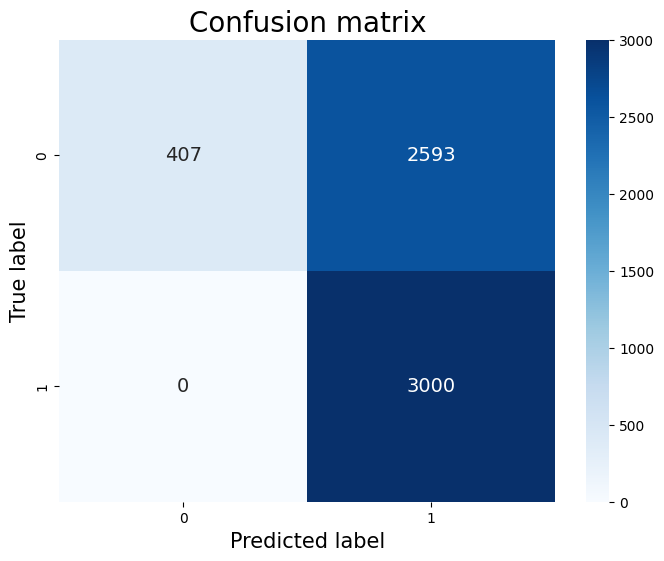

In [19]:
cf_matrix = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cf_matrix)

In [20]:
os.chdir(os.path.join(os.getcwd()))
import pickle

# save 
with open('model_1D_STFT_EX0.pkl', 'wb') as f:
    pickle.dump(model, f)